In [ ]:
# Importing the necessary libraries
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [ ]:
# Importing playlist dataframes
df = pd.read_csv('encoded_playlist_songs.csv')
df_fav = pd.read_csv('favorite_songs.csv')

# Preparing data for the model

In [ ]:
# Remove song name, artist, album
df = pd.concat([df, df_fav], axis=0)
df.shape

(8933, 13)

In [ ]:
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7MAibcTli4IisCtbHKrGMh,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4,0
1,5QO79kh1waicV47BqGRL3g,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4,0
2,1diS6nkxMQc3wwC4G1j0bh,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4,0
3,4u4NyuceXP7Uzh7XFJKCr1,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4,0
4,3Ofmpyhv5UAQ70mENzB277,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,0


In [ ]:
df['favorite'].value_counts()

0    8883
1      50
Name: favorite, dtype: int64

# Model Selection, Data Prepation and Hyperparameter Tuning

In [ ]:
#Data Prep and Model Selection and Parameter Tuning
#Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Creating and Training test sets

In [ ]:
# Creating training and test sets
# Shuffle your dataset
shuffle_df = df.sample(frac=1)

# Define a size for your training set
train_size = int(0.8 * len(df))

# Split dataset
train_set = shuffle_df[:train_size]
test_set = shuffle_df[:train_size]

In [ ]:
train_set.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
3721,2t5m1jQhBn9IKziKQwFUc7,184306,28,0.646,0.05500,0.914,0.0000,0.0985,-4.392,0.0409,152.002,4,0
1355,52ySvuxscDGsXUVsci1Kpa,205296,66,0.877,0.02880,0.747,0.0000,0.2730,-5.873,0.3650,145.162,4,0
3801,6xwn1ce0YplRNLH2bFaYdg,274618,0,0.636,0.00117,0.781,0.0000,0.0346,-4.681,0.0517,83.002,4,0
1988,1pwWrPxonLIE12WWu9NzgU,222960,54,0.647,0.25800,0.465,0.1490,0.1110,-10.272,0.0245,94.035,4,0
4869,1upAhgDBWCV0AvUxgAU6SR,179349,50,0.389,0.82600,0.408,0.0986,0.3830,-12.158,0.0538,74.183,4,0


In [ ]:
X = train_set.drop(columns=['favorite', 'track_id'])
Y = train_set.favorite

X.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
3721,184306,28,0.646,0.05500,0.914,0.0000,0.0985,-4.392,0.0409,152.002,4
1355,205296,66,0.877,0.02880,0.747,0.0000,0.2730,-5.873,0.3650,145.162,4
3801,274618,0,0.636,0.00117,0.781,0.0000,0.0346,-4.681,0.0517,83.002,4
1988,222960,54,0.647,0.25800,0.465,0.1490,0.1110,-10.272,0.0245,94.035,4
4869,179349,50,0.389,0.82600,0.408,0.0986,0.3830,-12.158,0.0538,74.183,4


In [ ]:
# Checking form imbalance
Y.value_counts()

0    7102
1      44
Name: favorite, dtype: int64

Since the number of favorite songs is so small compared to the rest of the non-favorite songs. I made the decision to oversample the favourite class to train a classification model on.

In [ ]:
# Train / Split Data
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X, Y)

In [ ]:
X_train.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,184306,28,0.646,0.05500,0.914,0.0000,0.0985,-4.392,0.0409,152.002,4
1,205296,66,0.877,0.02880,0.747,0.0000,0.2730,-5.873,0.3650,145.162,4
2,274618,0,0.636,0.00117,0.781,0.0000,0.0346,-4.681,0.0517,83.002,4
3,222960,54,0.647,0.25800,0.465,0.1490,0.1110,-10.272,0.0245,94.035,4
4,179349,50,0.389,0.82600,0.408,0.0986,0.3830,-12.158,0.0538,74.183,4


In [ ]:
# Checking if imbalance is gone
Y_train.value_counts()

0    7102
1    7102
Name: favorite, dtype: int64

Now that the classses in the train set are balanced, the models should be less biased towards being a non-favorite and be more accurate on the test data and real application.

In [ ]:
test_set.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
3721,2t5m1jQhBn9IKziKQwFUc7,184306,28,0.646,0.05500,0.914,0.0000,0.0985,-4.392,0.0409,152.002,4,0
1355,52ySvuxscDGsXUVsci1Kpa,205296,66,0.877,0.02880,0.747,0.0000,0.2730,-5.873,0.3650,145.162,4,0
3801,6xwn1ce0YplRNLH2bFaYdg,274618,0,0.636,0.00117,0.781,0.0000,0.0346,-4.681,0.0517,83.002,4,0
1988,1pwWrPxonLIE12WWu9NzgU,222960,54,0.647,0.25800,0.465,0.1490,0.1110,-10.272,0.0245,94.035,4,0
4869,1upAhgDBWCV0AvUxgAU6SR,179349,50,0.389,0.82600,0.408,0.0986,0.3830,-12.158,0.0538,74.183,4,0


In [ ]:
# Setting the test data sets
X_test = test_set.drop(columns=['favorite', 'track_id'])
Y_test = test_set['favorite']

In [ ]:
X_test.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
3721,184306,28,0.646,0.05500,0.914,0.0000,0.0985,-4.392,0.0409,152.002,4
1355,205296,66,0.877,0.02880,0.747,0.0000,0.2730,-5.873,0.3650,145.162,4
3801,274618,0,0.636,0.00117,0.781,0.0000,0.0346,-4.681,0.0517,83.002,4
1988,222960,54,0.647,0.25800,0.465,0.1490,0.1110,-10.272,0.0245,94.035,4
4869,179349,50,0.389,0.82600,0.408,0.0986,0.3830,-12.158,0.0538,74.183,4


In [ ]:
# Checking for imbalance in test set
Y_test.value_counts()

0    7102
1      44
Name: favorite, dtype: int64

# Testing models
I am using logistic regression as a baseline to compare the other models to. The 2 models in the demostration are **DecsionTreeClassifier** and **RandomForestClassifier**. The expectation is that these models outperform logistic regression due to sequential decision making.

In [ ]:
#Testing models
%time
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, Y_train)
lr_scores = cross_val_score(lr, X_train, Y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
0.7657553097776264


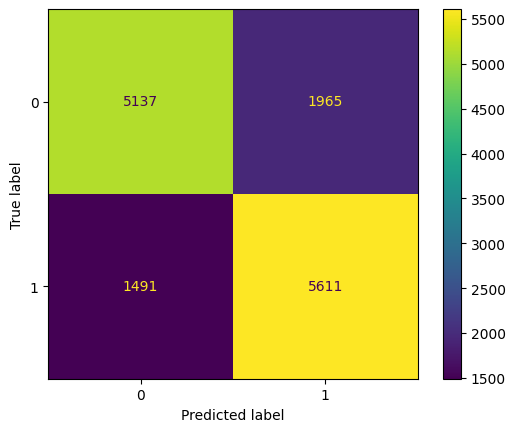

In [ ]:
#Logistic Regression confusion matrix
lr_pred = lr.predict(X_train)
cm = confusion_matrix(Y_train, lr_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15, 20, 30],
}
dtc = Pipeline([('CV', GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, Y_train)
dtc.named_steps['CV'].best_params_


{'max_depth': 20}

In [ ]:
%time
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=30).fit(X_train, Y_train)
dt_scores = cross_val_score(dt, X_train, Y_train, cv=10, scoring="f1")
np.mean(dt_scores)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


0.9935400878464516

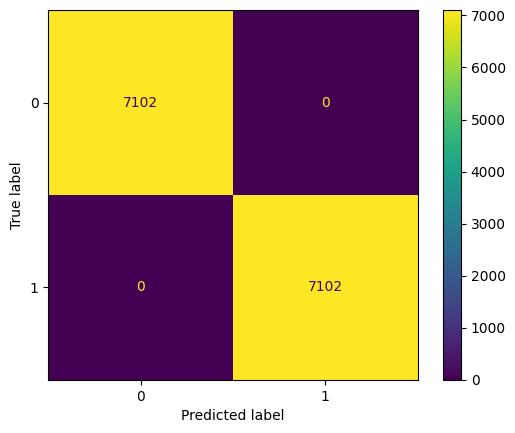

In [ ]:
X_train_pred = dt.predict(X_train)
dtm = confusion_matrix(Y_train, X_train_pred)

dtm_display = ConfusionMatrixDisplay(dtm).plot()

In [ ]:
%time
#Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[3,6,12,15,20],
    'n_estimators':[10, 20, 30]
}
clf = Pipeline([('CV', GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, Y_train)
clf.named_steps['CV'].best_params_

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


{'max_depth': 20, 'n_estimators': 10}

In [ ]:
%time
# Random Forest Classifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, Y_train))])
rf_scores = cross_val_score(rf, X_train, Y_train, cv = 10, scoring="f1")
np.mean(rf_scores)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


0.9967707355289864

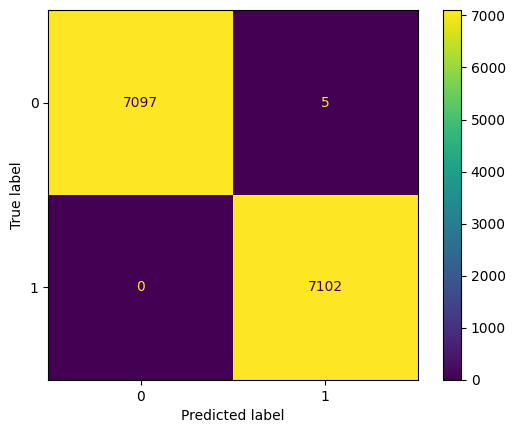

In [ ]:
X_train_rf = rf.predict(X_train)

rfm = confusion_matrix(Y_train, X_train_rf)
rfm_display = ConfusionMatrixDisplay(rfm).plot()

Although the RandomForestClassifier had the highest accuracy, the confusion matrix showed the DecisionTreeClassifier truly had the higher accuracy because it has less false positives and negatives.

Therefore, I will be using the DecisionTreeClassifier as my recommendation algorithm.

In [ ]:
Y_test.value_counts()


0    7102
1      44
Name: favorite, dtype: int64

In [ ]:
#Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth = 30))
pipe.fit(X_train, Y_train) #apply scaling on the training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])
pipe.score(X_test, Y_test)

1.0

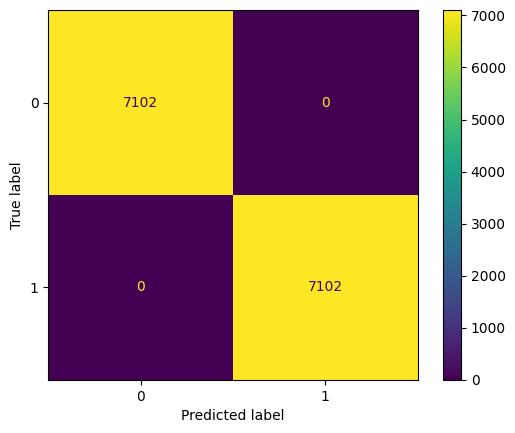

In [ ]:
X_train_dt = pipe.predict(X_train)

dtm = confusion_matrix(X_train_dt, Y_train)
dtm_display = ConfusionMatrixDisplay(dtm).plot()

After running the algorithm, you'll notice that there no false positives however. I could not recommend a single song. However, it seems to think I might like 7102 songs in the future which is a win? Since it recommended 0 songs there shouldn't be a playlist right?
Since, 7102 future songs I might the algorithm should at least get at 10+ songs on a playlist.

# Predicting songs and saving to dataset

In [ ]:
# Predicting songs and saving to dataset
# Reloading the original dataframe to test model on
df = pd.read_csv('encoded_playlist_songs.csv')

In [ ]:
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7MAibcTli4IisCtbHKrGMh,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4,0
1,5QO79kh1waicV47BqGRL3g,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4,0
2,1diS6nkxMQc3wwC4G1j0bh,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4,0
3,4u4NyuceXP7Uzh7XFJKCr1,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4,0
4,3Ofmpyhv5UAQ70mENzB277,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,0


Since the model has a niche idea of what a favorite song is, based on the favorites dataset, it is necessary to accept songs that might not be absolute favorites. This is done by using a threshold and sklearn's proba function.

I picked 0.3 to get around 10+ song recommendations from a dataset of 10,000 songs to choose from. You can play with value if based on the number songs you want to be recommended.

Note: With smaller datasets the results may vary widely. For example, from a dataset 750 songs I got a playlist of 3 songs, 1 or even sometimes none when testing.

In [ ]:
# predicting if a song is a favorite
prob_pred = pipe.predict_proba(df.drop(['favorite','track_id'], axis=1))
threshold = 0.30 #might get 4 songs or less
preds = [1 if prob_pred[i][1]> threshold else 0 for i in range(len(prob_pred))]
df['predicition'] = preds


In [ ]:
df['predicition'].value_counts()

0    8868
1      15
Name: predicition, dtype: int64

# Building the playlist from recommended songs

In [ ]:
!pip install spotipy --upgrade
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Insert your spotify username and the credentials from Spotify developer
cid = '****************************'
secret = '****************************'
redirect_uri='https://colab.research.google.com/drive/1042ZhLS-LTYdU9YJDv6qm_RYzsWW0CUt/callback'
username = '*************************'

In [ ]:
# Once the Authorisation is complete, we just need to `sp` to call the APIs
scope = 'user-top-read playlist-modify-private playlist-modify-public'
sp = spotipy.Spotify(auth_manager=spotipy.SpotifyOAuth(
          client_id=cid,
          client_secret= secret,
          redirect_uri= redirect_uri,
          scope=scope, open_browser=False))
print(sp.current_user())
print("\n")
print(sp)

{'display_name': 'Avom', 'external_urls': {'spotify': 'https://open.spotify.com/user/zmefuc6bodbfwnqvcjqxr4fua'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/users/zmefuc6bodbfwnqvcjqxr4fua', 'id': 'zmefuc6bodbfwnqvcjqxr4fua', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab6775700000ee85d1691b8c30220805033db23b', 'width': None}], 'type': 'user', 'uri': 'spotify:user:zmefuc6bodbfwnqvcjqxr4fua'}




In [ ]:
# Creating a function that builds a playlist in the user's spotify account
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [ ]:
create_playlist(sp, username, 'Your New Jams', 'This playlist was created using python!')

In [ ]:
# Function to check if the playlist was created successfully
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """

    id = []
    name = []
    num_tracks = []

    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [ ]:
fetch_playlists(sp,username).head()

,id,name,#tracks
0,136psNDfPp0FLt8Vi6tC8H,Your New Jams,0
1,0J80bghWQtVswpnRWnJAem,Your New Jams,15
2,3qJeepqaLuCqZrqXBTmBBs,Your New Jams,6
3,3cpm63ERNW5ny8SacpB76v,Your New Jams,3
4,7KRh4PbNlf0q7Lc8ENijZb,Your New Jams,0


In [ ]:

# Getting the playlist ID of the most recently made playlist so we can add songs to it later
playlist_id = fetch_playlists(sp,username)['id'][0]

In [ ]:
# Function to add selected songs to playlist
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []

    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 50])
        index += 50

In [ ]:
# Adding songs to playlist
list_track = df.loc[df['predicition']  == 1]['track_id']
enrich_playlist(sp, username, playlist_id, list_track)

Now check your Spotify playlists; you'll see a playlist titled 'Your New Jams'. Enjoy!